# Isochrone Map of Hotspots in Tokyo

I have made an isochrone map of hotspots in Tokyo, Japan. This map shows a 15 minute walk-time radius around the hotspot in Tokyo.

Since this code uses latitude and longitude for the isochrone maps, I needed to find the lat/long for the hotspots. I used the Geocode Google sheets extension by Awesome Table to get the lat/long for each hotspot. I have selected 31 places I knew were hotspots in Tokyo and got their lat/longs.

Here is the tableau of the isochrone maps showing the train stations and hotspots in Tokyo.

https://public.tableau.com/app/profile/brendan.sakihara1778/viz/TrainStationandHotspotsinTokyoMap/Dashboard1

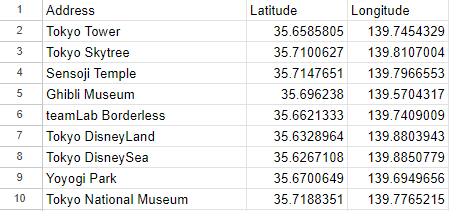

In [1]:
import geopandas as gp
import pandas as pd
from shapely.geometry import Polygon
from routingpy.routers import MapboxOSRM
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt
import fiona
import osmnx as ox

In [3]:
df = pd.read_excel('Tokyo Hotspots.xlsx', sheet_name= 'Sheet1')

In [4]:
df.head()

,Address,Latitude,Longitude
0,Tokyo Tower,35.658580,139.745433
1,Tokyo Skytree,35.710063,139.810700
2,Sensoji Temple,35.714765,139.796655
3,Ghibli Museum,35.696238,139.570432
4,TeamLab Borderless,35.662133,139.740901


In [5]:
# Code from Kyle Walker https://walker-data.com/posts/python-isochrones/

def mb_isochrone(df, time = [], profile = "walking"):
    coordinates = df[['Longitude', 'Latitude']].values.tolist()

    

      # Build a list of shapes
    isochrone_shapes = []

    if type(time) is not list:
        time = [time]

    # Use minutes as input, but the API requires seconds
    time_seconds = [60 * x for x in time]

    # Given the way that routingpy works, we need to iterate through the list of 
    # coordinate pairs, then iterate through the object returned and extract the 
    # isochrone geometries.  
    for c in coordinates:
        iso_request = mb.isochrones(locations = c, profile = profile,
                                    intervals = time_seconds, polygons = "true")

        for i in iso_request:
            iso_geom = Polygon(i.geometry[0])
            isochrone_shapes.append(iso_geom)

    # Here, we re-build the dataset but with isochrone geometries
    df_values = df.drop(columns = ['Longitude', 'Latitude'])

    time_col = time * len(df_values)

    # We'll need to repeat the dataframe to account for multiple time intervals
    df_values_rep = pd.DataFrame(np.repeat(df_values.values, len(time_seconds), axis = 0))
    df_values_rep.columns = df_values.columns

    isochrone_gdf = gp.GeoDataFrame(
        data = df_values_rep,
        geometry = isochrone_shapes,
        crs = 4326
    )

    isochrone_gdf['time'] = time_col

    # We are sorting the dataframe in descending order of time to improve visualization
    # (the smallest isochrones should go on top, which means they are plotted last)
    isochrone_gdf = isochrone_gdf.sort_values('time', ascending = False)



    return(isochrone_gdf)

In [6]:
df_geo = gp.GeoDataFrame(df, geometry = gp.points_from_xy(df['Longitude'], df['Latitude']))
df_geo

,Address,Latitude,Longitude,geometry
0,Tokyo Tower,35.658580,139.745433,POINT (139.74543 35.65858)
1,Tokyo Skytree,35.710063,139.810700,POINT (139.81070 35.71006)
2,Sensoji Temple,35.714765,139.796655,POINT (139.79666 35.71477)
3,Ghibli Museum,35.696238,139.570432,POINT (139.57043 35.69624)
4,TeamLab Borderless,35.662133,139.740901,POINT (139.74090 35.66213)
5,Tokyo DisneyLand,35.632896,139.880394,POINT (139.88039 35.63290)
6,Tokyo DisneySea,35.626711,139.885078,POINT (139.88508 35.62671)
7,Yoyogi Park,35.670065,139.694966,POINT (139.69497 35.67006)
8,Tokyo National Museum,35.718835,139.776522,POINT (139.77652 35.71884)
9,Tokyo Imperial Palace,35.685175,139.752800,POINT (139.75280 35.68518)


In [7]:
library_isos = mb_isochrone(df_geo, time = 15, 
                            profile = "walking")


m = library_isos.explore()
m = df_geo['geometry'].explore(m=m,marker_kwds={'radius': 5, 'color': 'black'})
m = df_geo['geometry'].explore(m=m,marker_kwds={'radius': 5, 'color': 'white'})

In [8]:
m

In [ ]:
library_isos.to_file(r'C:/Users/Brendan/Desktop/DA/Projects/Japan Train Station Maps/Isochrones/Tokyo Hotspot Iso.shp', driver='ESRI Shapefile')